In [2]:
from keras.layers import Input, Dense
from keras.models import Model

In [6]:
# endoding dim은 축소된  representation vector의 크기를 말합니다.
encoding_dim = 32 # 32 floats → compression of factor 24.5, assuming the input

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [7]:
encoder = Model(input_img, encoded)
encoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
from keras.datasets import mnist
import numpy as np

(x_train,_), (x_test,_) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [10]:
x_train = x_train.astype('float32') / 255                                   # (60000, 28, 28, 1)
x_test  = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))       # np.prod(28, 28, 1) = 28 * 28 * 1  = 784
x_test  = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [11]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.3563 - val_loss: 0.2689
Epoch 2/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.2597 - val_loss: 0.2474
Epoch 3/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2371 - val_loss: 0.2251
Epoch 4/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2173 - val_loss: 0.2078
Epoch 5/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2029 - val_loss: 0.1958
Epoch 6/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1927 - val_loss: 0.1870
Epoch 7/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1848 - val_loss: 0.1800
Epoch 8/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1783 - val_loss: 0.1738
Epoch 9/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1725 - val_loss: 0.1683
Epoc

In [12]:
decoded_imgs = autoencoder.predict(x_test)

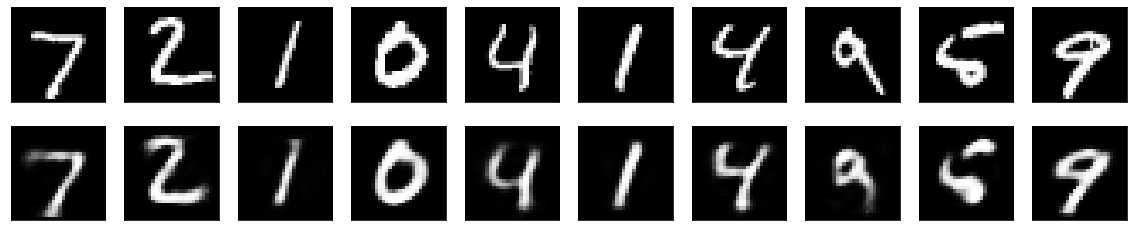

In [14]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

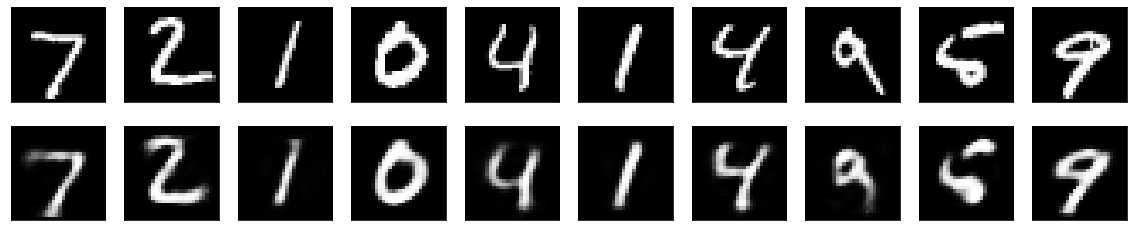

In [16]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()